# Simulation experiments

This notebook follows the examples in `model_examples.ipynb`.

In [1]:
import numpy as np
from py.model import *
# from py.simulation import stochastic_update, deterministic_update
from SpringRank import SpringRank
from matplotlib import pyplot as plt

[[0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]]
gamma  : [0.25 0.25 0.25 0.25]  sum: 1.0
scores : [0. 0. 0. 0.]  sum : 0.0

[[0.07420891 0.04973552 0.06051175 0.06554382]
 [0.07420891 0.04973552 0.06051175 0.06554382]
 [0.07420891 0.04973552 0.06051175 0.06554382]
 [0.07420891 0.04973552 0.06051175 0.06554382]]
gamma  : [0.29644639 0.19936601 0.24208298 0.26210461]  sum: 1.0
scores : [ 0.09030407 -0.10805794 -0.01098885  0.02874272]  sum : 3.1787072973799013e-14

[[0.20353215 0.01547428 0.0154866  0.01550696]
 [0.20353215 0.01547428 0.0154866  0.01550696]
 [0.20353215 0.01547428 0.0154866  0.01550696]
 [0.20353215 0.01547428 0.0154866  0.01550696]]
gamma  : [0.81412887 0.06191362 0.06194928 0.06200823]  sum: 0.9999999999999998
scores : [ 0.64391939 -0.21487343 -0.21468153 -0.21436444]  sum : 1.7236212457305555e-14



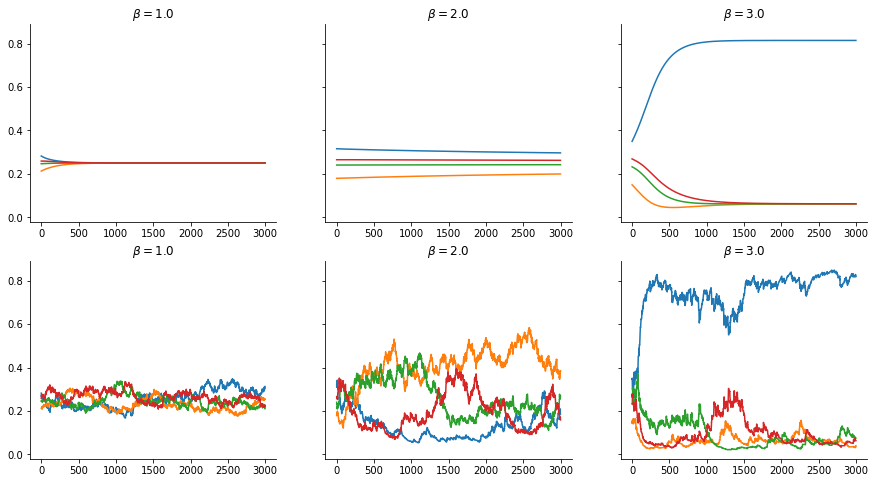

In [2]:
# do a few experiments
# print A, GAMMA, and S at the last time step

# parameters for the fig

m_plots = 3
BETAS = np.linspace(1, 3, m_plots)
methods = [deterministic_update, stochastic_update]

n_rounds = 3000
lam = .99

n = 4

# initial condition

A0 = np.random.rand(n,n)
A0 = A0 / A0.sum()

# initialize the model

M = model()
M.set_score(
    score_function = lambda A: SpringRank.SpringRank(A.T, alpha = 10**(-15))
)
linear_feature = lambda s: np.tile(s, (len(s),1))
M.set_features([linear_feature])

# create fig

fig, axarr = plt.subplots(len(methods), m_plots, figsize = (15, 8), squeeze = False, sharey = True)

# loop through axs, doing a simulation for each and plotting. 

for k in range(len(methods)):
    for i in range(m_plots):
        T = M.simulate(lam = lam,
                       beta = np.array([BETAS[i]]), 
                       A0 = A0, 
                       n_rounds = n_rounds, 
                       update = methods[k], 
                       m_updates = 1)
        GAMMA = M.get_rates()
        A     = M.get_states()
        S     = M.get_scores()
        
        # for deterministic sims, print the last timestep
        if methods[k] == deterministic_update:
            print(A[-1])
            print("gamma  :",GAMMA.mean(axis = 1)[-1,]," sum:",np.sum(GAMMA.mean(axis = 1)[-1,]))
            print("scores :",S[-1,]," sum :",np.sum(S[-1,]))
            print("")
            
        axarr[k][i].plot(GAMMA.mean(axis = 1))
        
        axarr[k][i].spines['right'].set_visible(False)
        axarr[k][i].spines['top'].set_visible(False)
        
        axarr[k][i].set_title(r'$\beta = $' + str(BETAS[i]))